In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pacientes = pd.read_csv('https://raw.githubusercontent.com/CodigoMaquina/code/main/datos/pacientes.csv')

pacientes.head(5)


,edad,colesterol,problema_cardiaco
0,63,233,1
1,37,250,1
2,41,204,1
3,56,236,1
4,57,354,1


In [121]:
pacientes.tail(5)

,edad,colesterol,problema_cardiaco
295,63,187,0
296,63,197,0
297,59,176,0
298,57,241,0
299,45,264,0


In [122]:
pacientes.describe()

,edad,colesterol,problema_cardiaco
count,300.000000,300.000000,300.000000
mean,54.303333,246.860000,0.550000
std,9.090661,51.563064,0.498325
min,29.000000,126.000000,0.000000
25%,47.000000,211.000000,0.000000
50%,55.000000,241.500000,1.000000
75%,61.000000,275.000000,1.000000
max,77.000000,564.000000,1.000000


In [123]:
pacientes.sum()

edad                 16291
colesterol           74058
problema_cardiaco      165
dtype: int64

In [124]:
saludables= pacientes[pacientes['problema_cardiaco']==0]
saludables

,edad,colesterol,problema_cardiaco
165,67,286,0
166,67,229,0
167,62,268,0
168,63,254,0
169,53,203,0
...,...,...,...
295,63,187,0
296,63,197,0
297,59,176,0
298,57,241,0


In [125]:
cardiacos=pacientes[pacientes['problema_cardiaco']== 1]
cardiacos

,edad,colesterol,problema_cardiaco
0,63,233,1
1,37,250,1
2,41,204,1
3,56,236,1
4,57,354,1
...,...,...,...
160,56,240,1
161,55,342,1
162,41,157,1
163,38,175,1


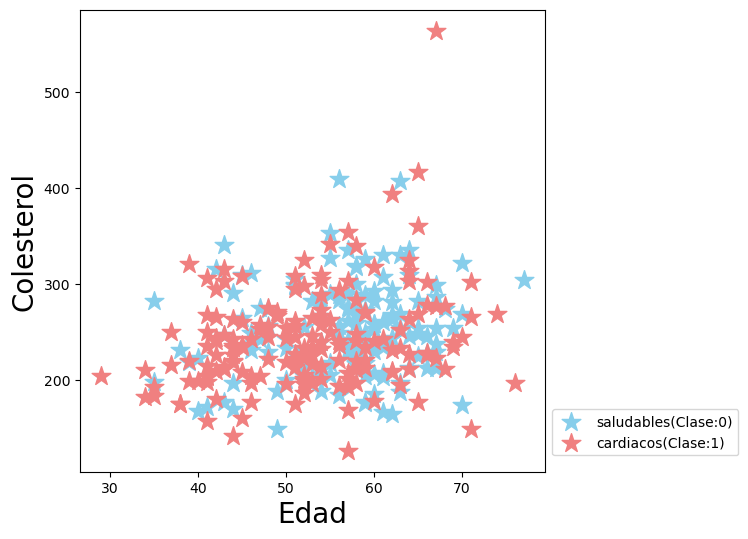

In [126]:
plt.figure(figsize=(6,6))

plt.xlabel("Edad",fontsize= 20.0)
plt.ylabel("Colesterol",fontsize = 20.0)

#saludables
plt.scatter(saludables["edad"], saludables["colesterol"],
            label = "saludables(Clase:0)", marker="*", c="skyblue", s=200)
#cardiacos
plt.scatter(cardiacos["edad"], cardiacos["colesterol"],
            label = "cardiacos(Clase:1)", marker="*", c="lightcoral", s=200)

plt.legend(bbox_to_anchor=(1,0.15))
plt.show()

In [127]:
#Datos no son lineamente separables para ser clasificados mediante una linea, 
#por lo que su clasficiacion se realiza dentro de conjunto de datos no clasificables, propiedad de arboles de decisiones


In [128]:
#Algoritmo para relializar un arbol de decision puede ser mediante entropia.

In [129]:
#ENTROPIA



In [130]:
from scipy.stats import entropy
from math import log

In [131]:
#calculo para entener como funciona el logaritmo

print(log(8,2))
#logaritmo de 8 base 2 = 3

3.0


In [132]:
#Esto quiere decir que debemos multiplicar el 2, 3 veces para que nos de un 8.

#2X2X2 =  4X2= 8

#Podemos asociar a cuantos bits necesitamos para almacenar la informacion
#Entropia es el promedio de informacion almacenada en una variable aleatoria.

#Bits = Logaritmo mas 1





In [133]:
#Logatirmo base 2 de 8, requerimos 3 +1 = 4 bits para representar el 8

# Aqui se ve la capacidad de almacenamiento de este valor.



In [134]:
#Entonces:

from scipy.stats import entropy #Funciond e scipy para calcular la entropia
from math import log

#Variable aleatoria podria ser el lanzamiento de  moneda 
#Ejemplo de lanzamiento de moneda cuando es justa:

#Probalidad de cara y cruz .5 de cada 1
print(entropy([1/2,1/2], base=2)) #base 2 porque es el sistema binario 1 (1/2) o 0 (1/2)

Nivel_de_entropia = (entropy([1/2,1/2], base=2)) 

print("El nivel de entropia es:", Nivel_de_entropia)


1.0
El nivel de entropia es: 1.0


In [135]:
#Ahora con una moneda truqueada seria:
print(entropy([6/10,4/10], base = 2))
#Es mas probable de que caiga cara porque la moneda esta sesgada


0.9709505944546688


In [136]:
#Exagerando sesgo, seria probablidad de caiga cara es 1 y 0 de que caiga cruz, esto seria un fraude

print(entropy([10/10,0/10], base=2))

0.0


In [137]:
#Variable aleatoria en contexto de clasificacion

In [138]:
#Ahora vamos a implementar este proceso a nuestro caso inicial de pacientes


from scipy.stats import entropy
from math import log

edades= pd.Series([40,30,20,50])
colesterol= pd.Series([100,110,100,110])

print(edades.value_counts())
print(edades.size)

print("starting")

print(edades.value_counts()/edades.size)  #100/4
print(colesterol.value_counts()/colesterol.size) #100/2
print(entropy(edades.value_counts()/edades.size, base=2))
print(entropy(colesterol.value_counts()/colesterol.size, base=2))



40    1
30    1
20    1
50    1
Name: count, dtype: int64
4
starting
40    0.25
30    0.25
20    0.25
50    0.25
Name: count, dtype: float64
100    0.5
110    0.5
Name: count, dtype: float64
2.0
1.0


In [139]:
#Entropia ayuda a seleccionar los nodos.

#Entropia de edad tiene mas caos, posibilidades que la entropia de colesterol

#Si la edad tuviera la mayor entropia solo 20 y 60 a;os, entonces si se verifica que todos los de 60 estan asociados a problemas cariagos y los de 20 no
#Entonces la entropia edad seria el primer nodo del arbol

#referente a las instancias que se van a cada lado , se repite proceso considerando las variables que se podrian de tener.



In [140]:
#Para crear arbol de decicion comenzamos con 
#Datos de entrenamiento y prueba

from sklearn.model_selection import train_test_split

datos_entrena, datos_prueba, clase_entrena, clase_prueba = train_test_split(
pacientes[["edad", "colesterol"]],
pacientes[["problema_cardiaco"]],
test_size=0.30)


In [141]:
#CREACION DEL ARBOL DE DECISION

from sklearn import tree

#generacion de modelo
arbol_decision= tree.DecisionTreeClassifier(criterion="entropy", 
                                           max_depth=2) #despues de ver el resultado se puede validar otra depth

arbol= arbol_decision.fit(datos_entrena, clase_entrena) #creacion de modelo de maquina,pasamos datos de entrenamiento y la clase de entrenamiento y guardamos objeto en variable arbol



In [142]:

#validar que tan bueno fue el modelo, se puede hacer con una metrica llamada accuracy


accuracy= arbol_decision.score(datos_prueba,clase_prueba)
print(accuracy)

0.5111111111111111


In [143]:
print(tree.export_text(arbol,feature_names=["Edad","Colesterol"]))

|--- Edad <= 45.50
|   |--- Colesterol <= 178.50
|   |   |--- class: 0
|   |--- Colesterol >  178.50
|   |   |--- class: 1
|--- Edad >  45.50
|   |--- Colesterol <= 248.50
|   |   |--- class: 1
|   |--- Colesterol >  248.50
|   |   |--- class: 0



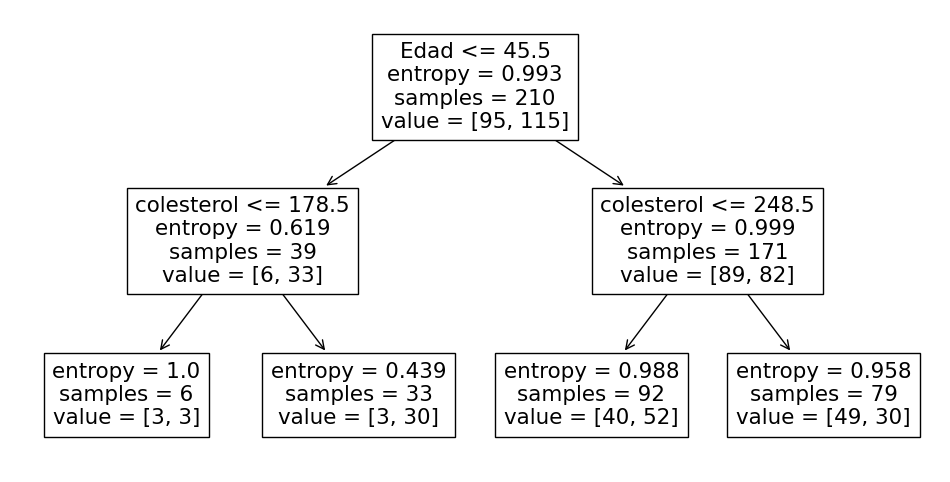

In [144]:
plt.figure(figsize=(12,6))

tree.plot_tree(arbol,
              feature_names=["Edad","colesterol"])

plt.show()


In [145]:
#Clasificacion de nuevos pacientes


In [119]:
print("Nuevo paciente", arbol_decision.predict([[70,150]]))

Nuevo paciente [1]


/Users/angel007/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
